# Features Details

| Variable Name                  | Role   | Type        | Demographic                                        | Description                                                                                   | Units | Missing Values |
|--------------------------------|--------|-------------|----------------------------------------------------|-----------------------------------------------------------------------------------------------|-------|----------------|
| Gender                         | Feature| Categorical | Gender                                             |                                                                                               |       | no             |
| Age                            | Feature| Continuous  | Age                                                |                                                                                               |       | no             |
| Height                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| Weight                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| family_history_with_overweight| Feature| Binary      |                                                    | Has a family member suffered or suffers from overweight?                                      |       | no             |
| FAVC                           | Feature| Binary      |                                                    | Do you eat high caloric food frequently?                                                      |       | no             |
| FCVC                           | Feature| Integer     |                                                    | Do you usually eat vegetables in your meals? (Frequency of Consuming Vegetables in Meals)                                      |       | no             |
| NCP                            | Feature| Continuous  |                                                    | How many main meals do you have daily?                                                        |       | no             |
| CAEC                           | Feature| Categorical |                                                    | Do you eat any food between meals?                                                            |       | no             |
| SMOKE                          | Feature| Binary      |                                                    | Do you smoke?                                                                                 |       | no             |
| CH2O                           | Feature| Continuous  |                                                    | How much water do you drink daily?                                                           |       | no             |
| SCC                            | Feature| Binary      |                                                    | Do you monitor the calories you eat daily?                                                    |       | no             |
| FAF                            | Feature| Continuous  |                                                    | How often do you have physical activity?                                                     |       | no             |
| TUE                            | Feature| Integer     |                                                    | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |       | no             |
| CALC                           | Feature| Categorical |                                                    | How often do you drink alcohol?                                                              |       | no             |
| MTRANS                         | Feature| Categorical |                                                    | Which transportation do you usually use?                                                      |       | no             |
| NObeyesdad                     | Target | Categorical |                                                    | Obesity level                                                                                |       | no             |


In [120]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout
import joblib




In [121]:
df = pd.read_csv("ObesityDataSet.csv")
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [122]:

mask_numeric = df.dtypes == float
df_numerical = df.loc[:, mask_numeric]

df_numerical

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


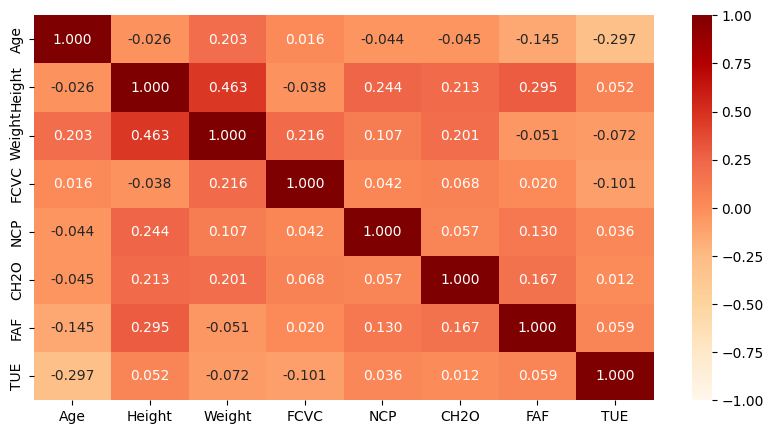

In [123]:
corr_numerical = df_numerical.corr()

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

In [124]:
unique_values_counts = df['NObeyesdad'].value_counts()
unique_values_counts

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

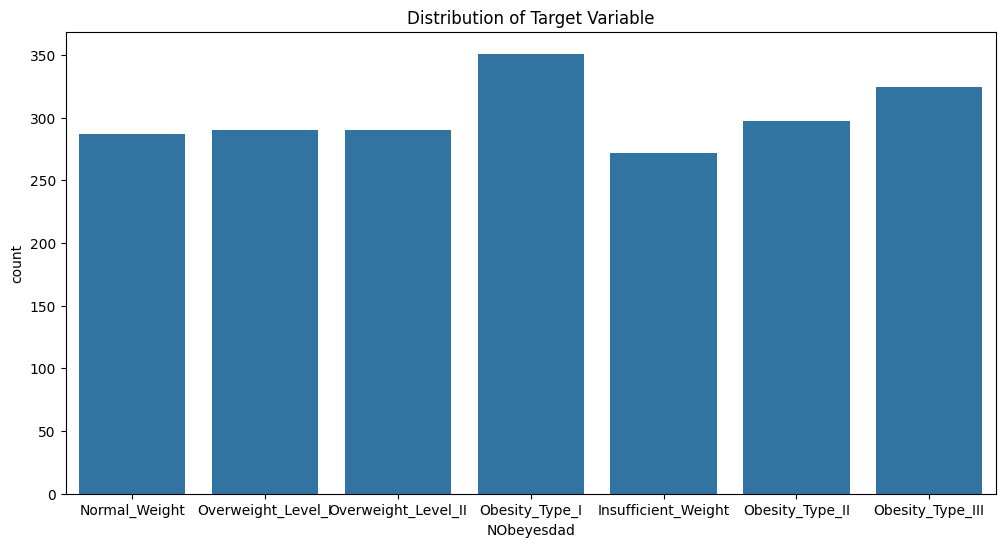

In [125]:

plt.figure(figsize=(12, 6))
sns.countplot(x="NObeyesdad", data=df)
plt.title("Distribution of Target Variable")
plt.show()

# data labeling

In [126]:
cat_features = df.select_dtypes(include = ['object'])
cat_features.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [127]:
cat_features

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [128]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [129]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : [0 1]
family_history_with_overweight : [1 0]
FAVC : [0 1]
CAEC : [2 1 0 3]
SMOKE : [0 1]
SCC : [0 1]
CALC : [3 2 1 0]
MTRANS : [3 4 0 2 1]
NObeyesdad : [1 5 6 2 0 3 4]


In [130]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [131]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [132]:
# scaler = StandardScaler()
# scaler = MinMaxScaler()

# For Plotting ROC, AUC & Calibration Curve 

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [134]:
def plot_roc_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probabilities[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_probabilities[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_probabilities.ravel())
    roc_auc["micro"] = roc_auc_score(y_true_bin, y_probabilities, average="micro")

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute precision-recall curve and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_probabilities[:, i])
        average_precision[i] = average_precision_score(y_true_bin[:, i], y_probabilities[:, i])

    # Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1], [1, 0], 'k--', lw=2)
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='class {0} (AP = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_calibration_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Plot calibration curve
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        prob_true, prob_pred = calibration_curve(y_true_bin[:, i], y_probabilities[:, i], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=f'Class {i}')
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

In [135]:
accuracy_data = []
precision_data = []
recall_data = []
f1_data = []

# RandomForestClassifier

In [136]:
scaler = StandardScaler()
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Initialize lists to store scores for each fold

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
rf_train_scores = []
rf_test_scores = []

for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    RFclassifier = RandomForestClassifier(n_estimators=300,criterion='entropy', min_samples_leaf=2)
    RFclassifier.fit(X_train_scaled, y_train)
    
    # Make predictions on the train set
    y_train_pred = RFclassifier.predict(X_train_scaled)
    rf_train_scores.append(accuracy_score(y_train, y_train_pred))
    
    # Make predictions on the test set
    y_pred = RFclassifier.predict(X_test_scaled)
    rf_test_scores.append(accuracy_score(y_test, y_pred))

    
    # Calculate metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))


accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")


# Print training and testing accuracies
print(f"Training Accuracy: {np.mean(rf_train_scores)} (±{np.std(rf_train_scores)})")
print(f"Testing Accuracy: {np.mean(rf_test_scores)} (±{np.std(rf_test_scores)})")

print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

Cross-validation results:
Accuracy: 0.9583333333333334 (±0.007383935109703748)
Precision (weighted): 0.9610501856023769 (±0.006857626066509725)
Recall (weighted): 0.9583333333333334 (±0.007383935109703748)
F1-score (weighted): 0.9587680204856724 (±0.007335942964898489)
Training Accuracy: 0.998104864181933 (±0.0005650203354390009)
Testing Accuracy: 0.9583333333333334 (±0.007383935109703748)
Confusion Matrix (average):
[[65.   3.   0.   0.   0.   0.   0. ]
 [ 0.8 64.9  0.   0.   0.   1.8  0.6]
 [ 0.   1.3 85.5  0.4  0.   0.2  1. ]
 [ 0.   0.1  0.1 74.4  0.2  0.   0. ]
 [ 0.   0.   0.   0.2 82.1  0.   0. ]
 [ 0.   6.2  0.   0.   0.  66.7  2. ]
 [ 0.   1.9  1.   0.   0.   1.2 67.4]]


In [137]:
from joblib import dump
dump((RFclassifier, scaler), 'rf_modal.joblib')

['rf_modal.joblib']

In [138]:
def plot_confusion_matrix(confusion_matrices):
    row_sums = np.sum(confusion_matrices, axis=2)
    normalized_matrices = confusion_matrices / row_sums[:, :, np.newaxis]
    average_normalized_matrix = np.mean(normalized_matrices, axis=0)
    plt.figure(figsize=(4, 3))
    sns.heatmap(average_normalized_matrix, annot=True, cmap='Blues', fmt='.2f', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix (Percentage)')
    plt.show()

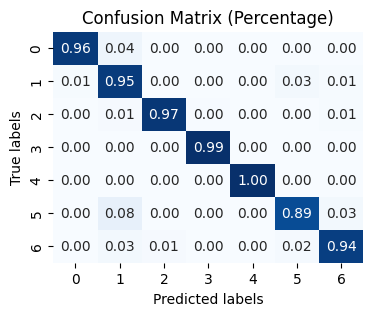

In [139]:
plot_confusion_matrix(confusion_matrices)

# For Training Testing Score Plot

In [140]:
def plot_train_test_score(train_scores, test_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), train_scores, marker='o', label='Training Score')
    plt.plot(range(1, 11), test_scores, marker='o', label='Testing Score')
    plt.title('Training and Testing Scores')
    plt.xlabel('nth fold')
    plt.ylabel('Score')
    plt.xticks(range(1, 11))
    plt.ylim(0.7, 1)  # Set the y-axis limits from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

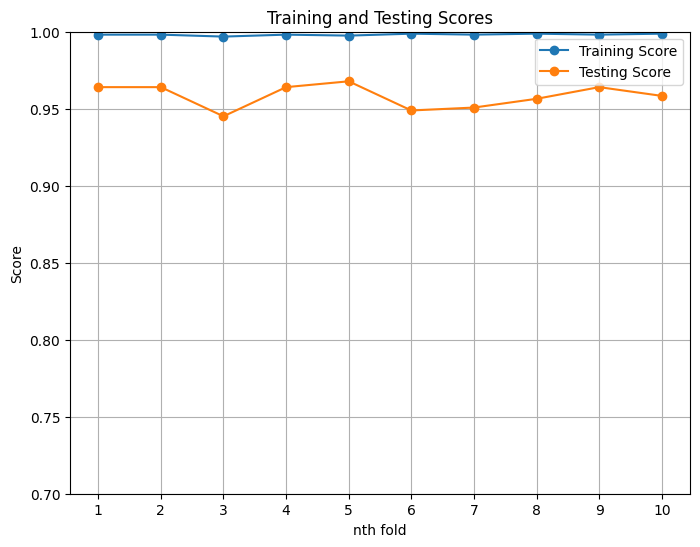

In [141]:
plot_train_test_score(rf_train_scores, rf_test_scores)

# LogisticRegression

In [142]:
from sklearn.metrics import log_loss

In [143]:

scaler = StandardScaler()

# Initialize lists to store training and validation costs
training_costs = []
validation_costs = []

# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    logreg = LogisticRegression(max_iter=1000, penalty="l2", solver="saga")
    logreg.fit(X_train_scaled, y_train)
    
    # Make predictions on the train set
    train_score = logreg.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    
    # Make predictions on the test set
    test_score = logreg.score(X_test_scaled, y_test)
    test_scores.append(test_score)
    
    y_test_pred = logreg.predict(X_test_scaled)

    # Compute training loss (cost)
    y_train_pred_proba = logreg.predict_proba(X_train_scaled)
    training_loss = log_loss(y_train, y_train_pred_proba)
    training_costs.append(training_loss)
        
    # Compute validation loss (cost)
    y_test_pred_proba = logreg.predict_proba(X_test_scaled)
    validation_loss = log_loss(y_test, y_test_pred_proba)
    validation_costs.append(validation_loss)

    # Evaluation metrics for scaled model
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_test_pred)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)

accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))


Cross-validation results:
Train Score: 0.8952621604548326 (±0.004717158484546922)
Test Score: 0.8759469696969697 (±0.015896685278593423)
Accuracy: 0.8759469696969697 (±0.015896685278593423)
Precision (weighted): 0.8788052796879736 (±0.015268700448598646)
Recall (weighted): 0.8759469696969697 (±0.015896685278593423)
F1-score (weighted): 0.8744871512495482 (±0.015778222308085895)
Confusion Matrix (average):
[[68.8  1.1  0.   0.   0.   0.   0. ]
 [ 9.9 49.7  0.   0.   0.   9.1  2.2]
 [ 0.   0.  77.7  4.6  0.5  1.   4.6]
 [ 0.   0.   1.3 68.2  0.7  0.   0. ]
 [ 0.   0.   0.3  0.2 77.9  0.   0. ]
 [ 0.   5.3  0.   0.   0.  60.5  9.6]
 [ 0.   1.1  4.1  0.4  0.   9.5 59.7]]


In [144]:
dump((logreg, scaler), 'logistic_regression.joblib')

['logistic_regression.joblib']

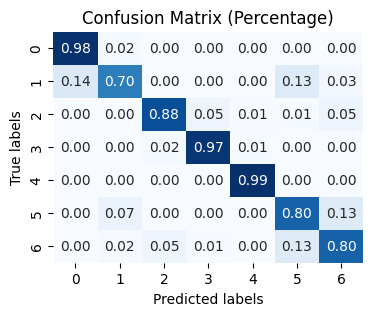

In [145]:
plot_confusion_matrix(confusion_matrices)

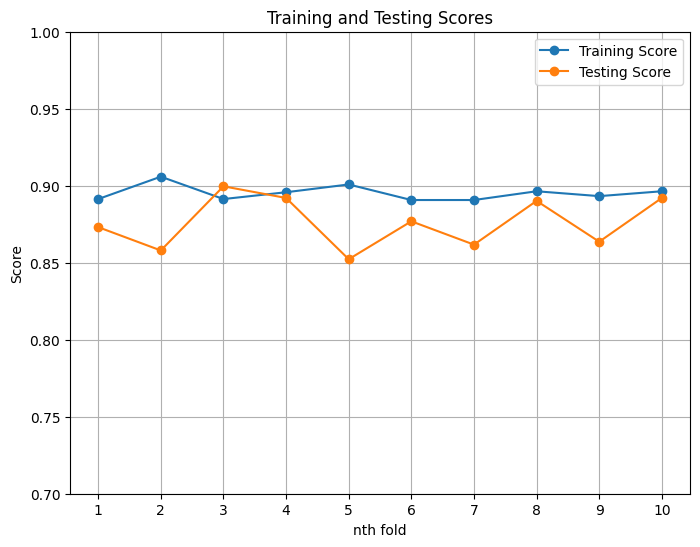

In [146]:
plot_train_test_score(train_scores, test_scores)

# loss graph

In [147]:
# import matplotlib.pyplot as plt

# # Assuming you have defined the training_cost and validation_cost lists somewhere in your code

# # Plotting the training and validation costs
# plt.plot(training_costs, color='blue', label='Training')
# plt.plot(validation_costs, color='red', label='Validation')

# # Adding labels and title
# plt.xlabel('Number of iterations')
# plt.ylabel('Cost')
# plt.title('Training and Validation Cost')

# # Adding legend
# plt.legend()

# # Display the plot
# plt.show()


# ROC AUC for Logistic regression

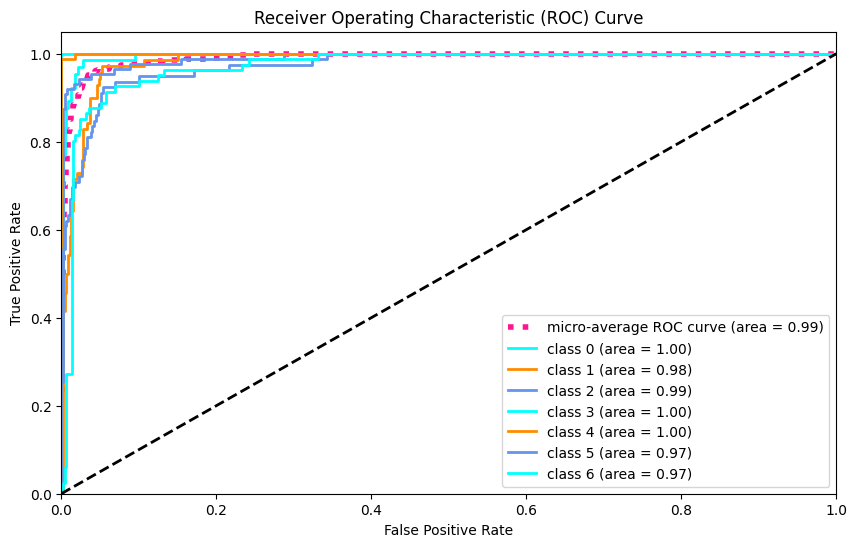

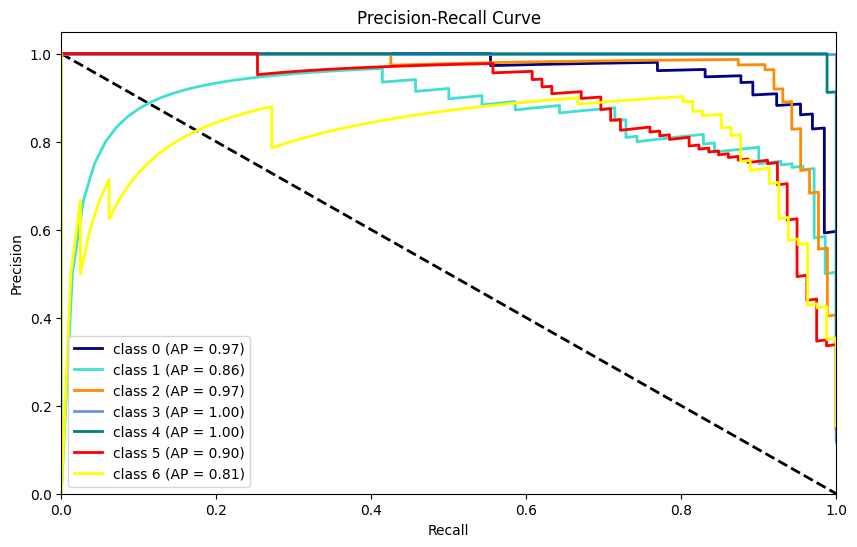

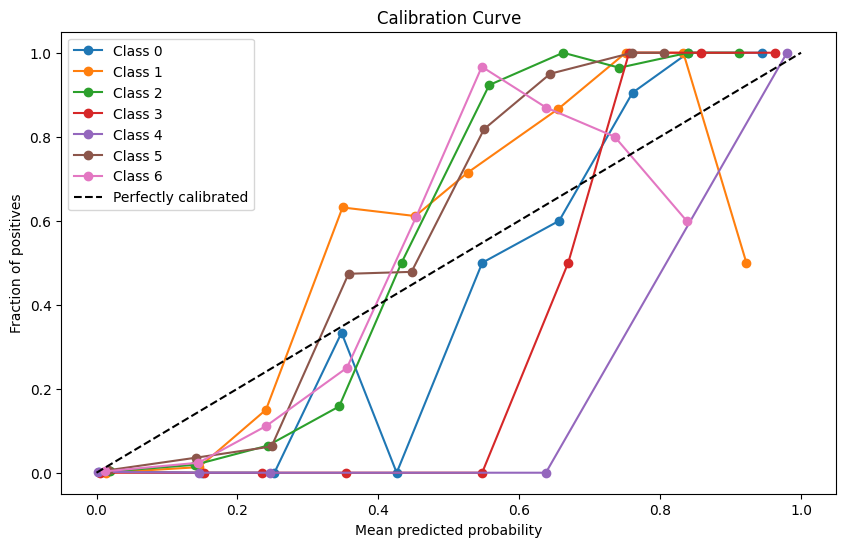

In [148]:
# Assuming n_classes is the number of classes in your classification problem
n_classes = 7
plot_roc_curve(y_test, y_test_pred_proba, n_classes)
plot_precision_recall_curve(y_test, y_test_pred_proba, n_classes)
plot_calibration_curve(y_test, y_test_pred_proba, n_classes)

# KNeighborsClassifier

In [149]:
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()

# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree') 
    knn.fit(X_train_scaled, y_train)
    # Make predictions on the train set
    train_score = knn.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    # Predictions on scaled test data
    y_pred_scaled =  knn.predict(X_test_scaled)

    # Make predictions on the test set
    test_score = knn.score(X_test_scaled, y_test)
    test_scores.append(test_score)

    # Evaluation metrics for scaled model
    accuracy = accuracy_score(y_test, y_pred_scaled)
    precision = precision_score(y_test, y_pred_scaled, average='weighted')
    recall = recall_score(y_test, y_pred_scaled, average='weighted')
    f1 = f1_score(y_test, y_pred_scaled, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred_scaled)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)


accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

Cross-validation results:
Train Score: 0.8330385344283007 (±0.004702330611230927)
Test Score: 0.7884469696969696 (±0.016834766938380968)
Accuracy: 0.7884469696969696 (±0.016834766938380968)
Precision (weighted): 0.7848715789910254 (±0.019181946300941548)
Recall (weighted): 0.7884469696969696 (±0.016834766938380968)
F1-score (weighted): 0.7771068519351556 (±0.017800564489863585)
Confusion Matrix (average):
[[66.4  3.3  0.6  0.   0.   1.8  0.2]
 [17.8 27.8  5.9  1.4  0.   8.  11. ]
 [ 0.4  1.4 70.7  5.8  1.   1.3  1.8]
 [ 0.   0.2  1.4 71.5  0.   0.2  0.9]
 [ 0.   0.   0.   0.1 79.2  0.5  0. ]
 [ 3.9  5.6 11.   1.3  0.1 48.8  2.7]
 [ 1.3  2.5  6.8  4.8  0.5  6.2 51.9]]


In [150]:
dump((knn, scaler), 'knn_modal.joblib')

['knn_modal.joblib']

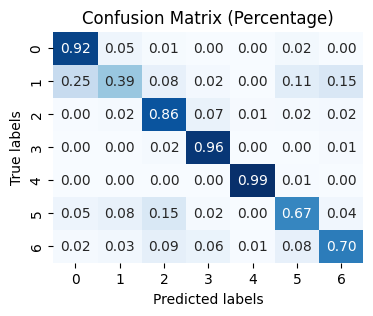

In [151]:
plot_confusion_matrix(confusion_matrices)

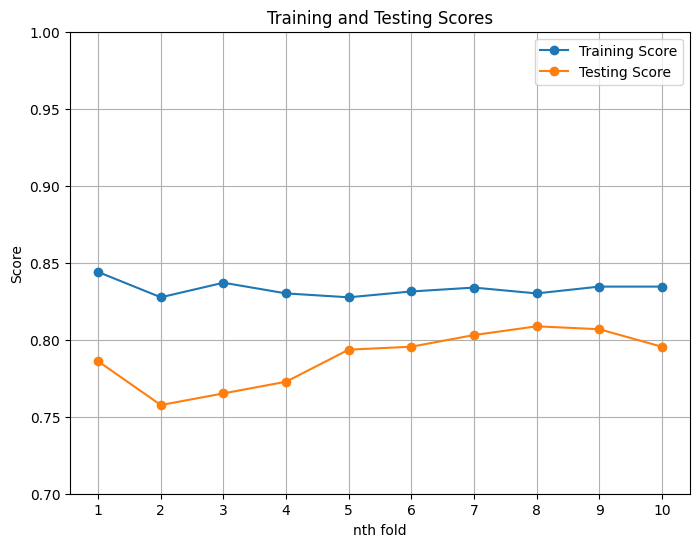

In [152]:
plot_train_test_score(train_scores, test_scores)

# SVM

In [153]:
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()

# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm = SVC(kernel='rbf', C=0.5)
    svm.fit(X_train_scaled, y_train)
    # Make predictions on the train set
    train_score = svm.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    # Predictions on scaled test data
    y_pred_scaled =  svm.predict(X_test_scaled)

    # Make predictions on the test set
    test_score = svm.score(X_test_scaled, y_test)
    test_scores.append(test_score)

    # Evaluation metrics for scaled model
    accuracy = accuracy_score(y_test, y_pred_scaled)
    precision = precision_score(y_test, y_pred_scaled, average='weighted')
    recall = recall_score(y_test, y_pred_scaled, average='weighted')
    f1 = f1_score(y_test, y_pred_scaled, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred_scaled)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)

accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

Cross-validation results:
Train Score: 0.8848389134554644 (±0.0067273614209539395)
Test Score: 0.8380681818181819 (±0.017932515893276806)
Accuracy: 0.8380681818181819 (±0.017932515893276806)
Precision (weighted): 0.8401008643414578 (±0.01885486176795567)
Recall (weighted): 0.8380681818181819 (±0.017932515893276806)
F1-score (weighted): 0.8381399543146841 (±0.018054277037471193)
Confusion Matrix (average):
[[58.1  6.4  0.   0.   0.   0.1  0. ]
 [ 6.1 50.5  0.7  0.   0.  10.7  6.4]
 [ 0.   4.3 74.2  6.6  0.1  0.9  1.8]
 [ 0.   1.2  1.2 72.2  0.   0.   0.1]
 [ 0.   0.1  0.   0.1 81.5  0.   0.3]
 [ 0.6  9.5  3.1  0.   0.  51.6  6.7]
 [ 0.1  6.3  5.1  0.2  0.   6.8 54.4]]


In [154]:
dump((svm, scaler), 'svm_modal.joblib')

['svm_modal.joblib']

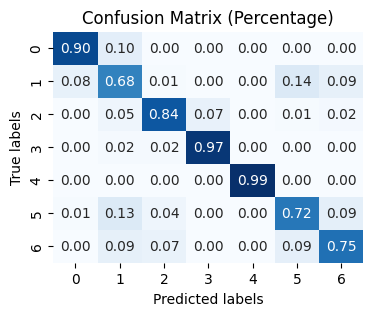

In [155]:
plot_confusion_matrix(confusion_matrices)

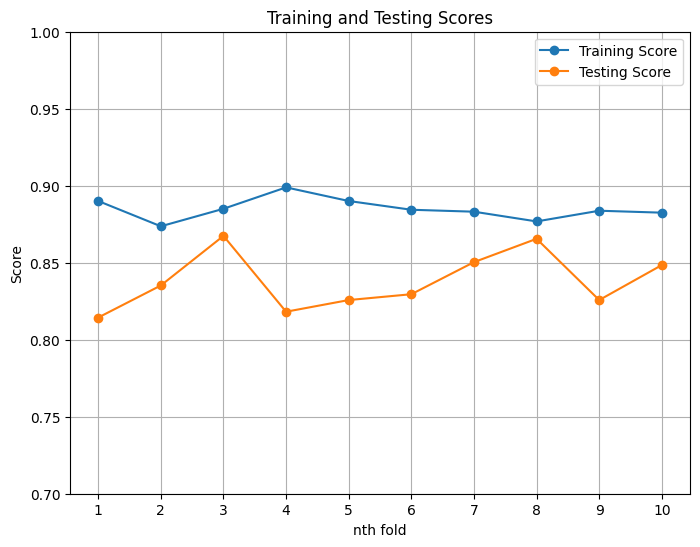

In [156]:
plot_train_test_score(train_scores, test_scores)

# Artificial Nueral Networks

/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


train score: 0.9810486435890198
test score: 0.9412878751754761


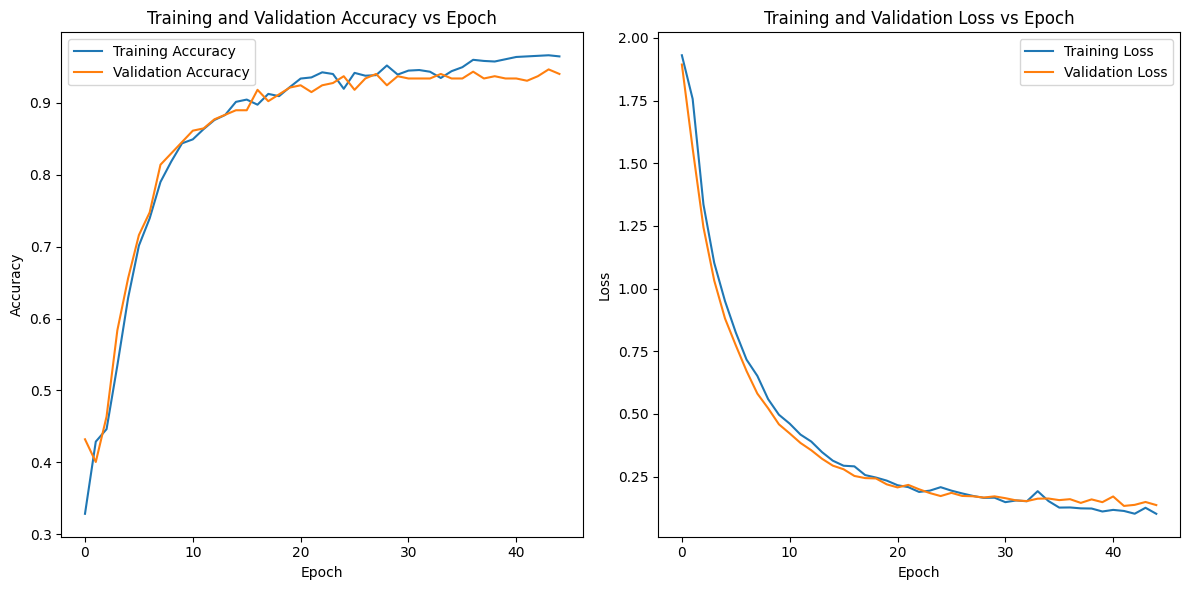

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_ANN = Sequential()
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)))
model_ANN.add(Dropout(0.12))
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model_ANN.add(Dropout(0.12))
model_ANN.add(Dense(7, kernel_initializer='uniform', activation='softmax'))

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_ANN.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=0, validation_split=0.2)

train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

print("train score: " + str(train_score))
print("test score: " + str(test_score))

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# ANN with 10 fold

In [158]:
# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ann = Sequential([
        Dense(64, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.1),
        Dense(64, kernel_initializer='uniform', activation='relu'),
        Dropout(0.1),
        Dense(7, kernel_initializer='uniform', activation='softmax')
    ])
    ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    ann.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=0)
    
    # Make predictions on the train set
    train_score = ann.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
    train_scores.append(train_score)
    
    # Make predictions on the test set
    test_score = ann.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1
    test_scores.append(test_score)

    # Make predictions on the test set
    y_pred = np.argmax(ann.predict(X_test_scaled), axis=-1)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)


accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Cross-validation results:
Train Score: 0.9917877495288849 (±0.002206482020827651)
Test Score: 0.9570075571537018 (±0.007482851297554648)
Accuracy: 0.9570075757575758 (±0.007482858433764539)
Precision (weighted): 0.9577049351221334 (±0.007392267387590621)
Recall (weighted): 0.9570075757575758 (±0.007482858433764539)
F1-score (weighted): 0.9569411357588782 (±0.007495665610655205)
Confusion Matrix (average):
[[64.4  2.3  0.   0.   0.   0.   0. ]
 [ 4.2 66.1  0.   0.   0.   3.5  0.1]
 [ 0.   0.  87.3  0.3  0.   0.1  1.4]
 [ 0.   0.   0.5 71.4  0.2  0.   0. ]
 [ 0.   0.   0.   0.6 80.5  0.   0. ]
 [ 0.   2.3  0.   0.   0.  69.5  3.5]
 [ 0.   0.   0.5  0.   0.   3.2 66.1]]


In [159]:
from keras.models import load_model
import keras

# Save the Keras model
# ann.save('ann_model.h5')
keras.saving.save_model(ann, 'ann.keras')

# Save the scaler using joblib
from joblib import dump
dump(scaler, 'scaler.joblib')



['scaler.joblib']

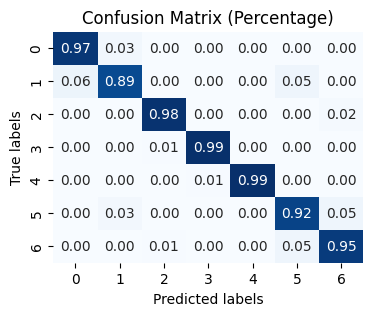

In [160]:
plot_confusion_matrix(confusion_matrices)

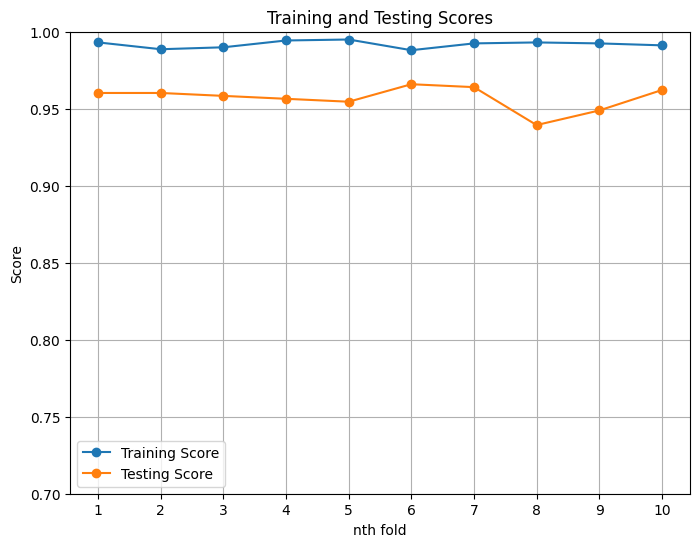

In [161]:
plot_train_test_score(train_scores, test_scores)

# ROC AUC for ANN

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


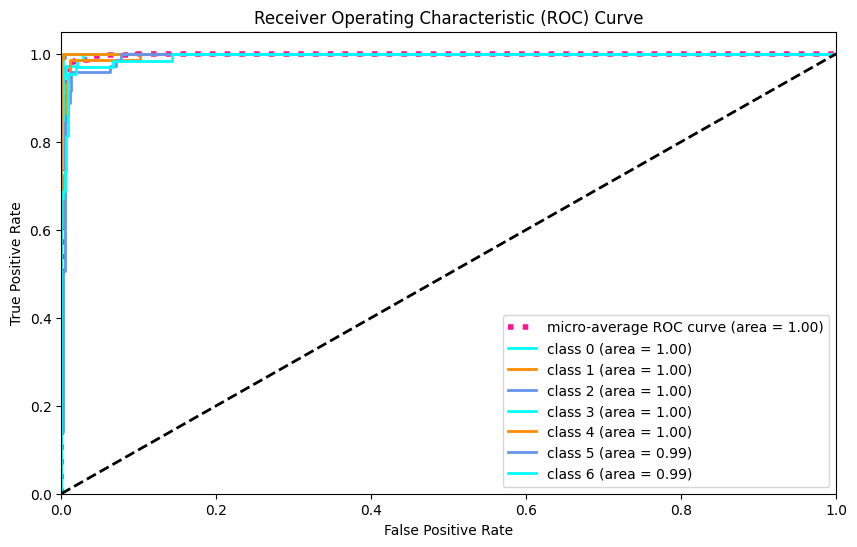

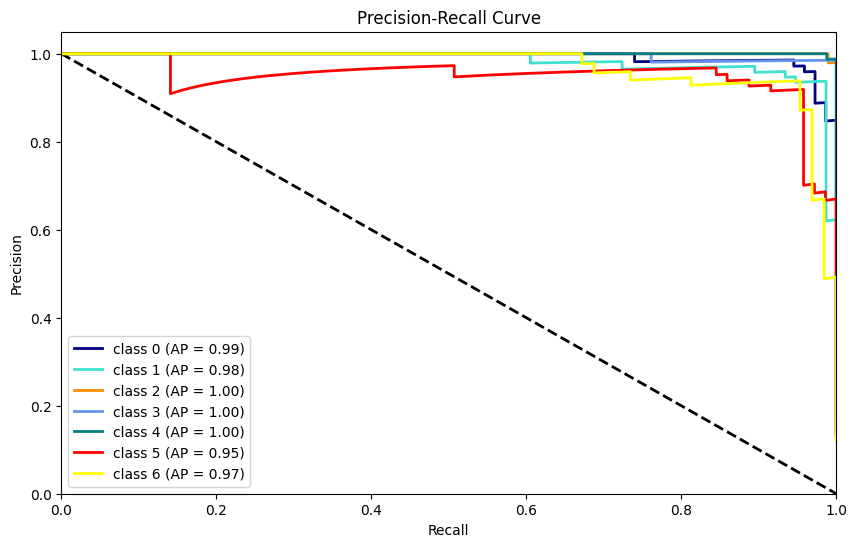

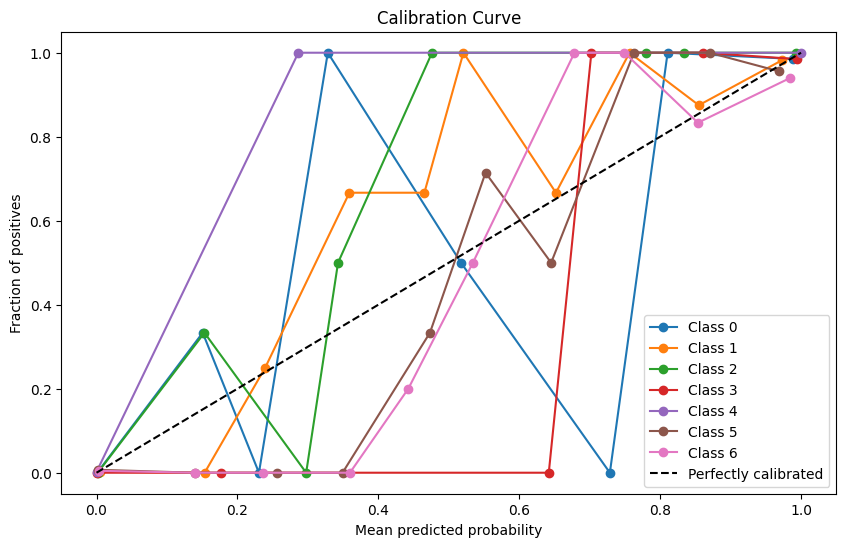

In [162]:
y_pred_proba = ann.predict(X_test_scaled)

# Assuming n_classes is the number of classes in your classification problem
n_classes = 7
plot_roc_curve(y_test, y_pred_proba, n_classes)
plot_precision_recall_curve(y_test, y_pred_proba, n_classes)
plot_calibration_curve(y_test, y_pred_proba, n_classes)

# Overall comparison of modal on Accuracy, Precision, Recall and F1 score

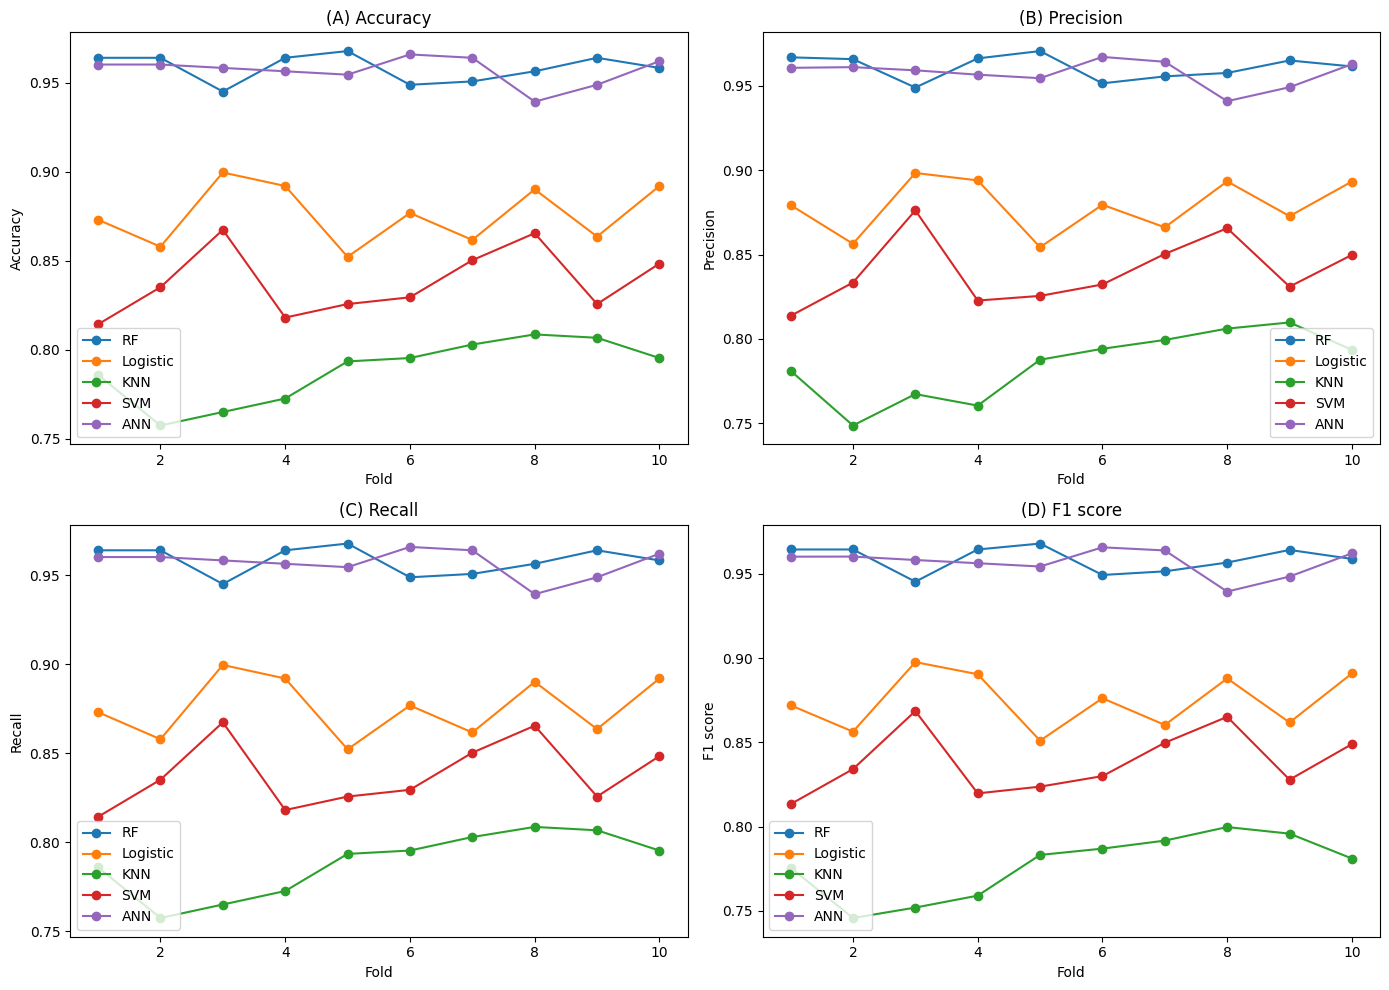

In [163]:
# Define the classifiers
classifiers = ["RF", 'Logistic', 'KNN', 'SVM', 'ANN']  # List of classifiers

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy
axs[0, 0].set_title('(A) Accuracy')
for i, classifier in enumerate(classifiers):
    axs[0, 0].plot(range(1, 11), accuracy_data[i], marker='o', label=classifier)
axs[0, 0].set_xlabel('Fold')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plot Precision
axs[0, 1].set_title('(B) Precision')
for i, classifier in enumerate(classifiers):
    axs[0, 1].plot(range(1, 11), precision_data[i], marker='o', label=classifier)
axs[0, 1].set_xlabel('Fold')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plot Recall
axs[1, 0].set_title('(C) Recall')
for i, classifier in enumerate(classifiers):
    axs[1, 0].plot(range(1, 11), recall_data[i], marker='o', label=classifier)
axs[1, 0].set_xlabel('Fold')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].set_title('(D) F1 score')
for i, classifier in enumerate(classifiers):
    axs[1, 1].plot(range(1, 11), f1_data[i], marker='o', label=classifier)
axs[1, 1].set_xlabel('Fold')
axs[1, 1].set_ylabel('F1 score')
axs[1, 1].legend()

plt.tight_layout()
plt.show()
